# Clustering

## DBSCAN - Density-based spatial clustering of applications with noise


The DBSCAN algorithm views clusters as areas of high density separated by areas of low density. Due to this rather generic view, clusters found by DBSCAN can be any shape, as opposed to k-means which assumes that clusters are convex shaped. The central component to the DBSCAN is the concept of core samples, which are samples that are in areas of high density. A cluster is therefore a set of core samples, each close to each other (measured by some distance measure) and a set of non-core samples that are close to a core sample (but are not themselves core samples). There are two parameters to the algorithm, `min_samples` and `eps`, which define formally what we mean when we say dense. Higher `min_samples` or lower `eps` indicate higher density necessary to form a cluster.

More formally, we define a core sample as being a sample in the dataset such that there exist `min_samples` other samples within a distance of `eps`, which are defined as neighbors of the core sample. This tells us that the core sample is in a dense area of the vector space. A cluster is a set of core samples that can be built by recursively taking a core sample, finding all of its neighbors that are core samples, finding all of their neighbors that are core samples, and so on. A cluster also has a set of non-core samples, which are samples that are neighbors of a core sample in the cluster but are not themselves core samples. Intuitively, these samples are on the fringes of a cluster.

Any core sample is part of a cluster, by definition. Any sample that is not a core sample, and is at least `eps` in distance from any core sample, is considered an outlier by the algorithm.

While the parameter `min_samples` primarily controls how tolerant the algorithm is towards noise (on noisy and large data sets it may be desirable to increase this parameter), the parameter `eps` is crucial to choose appropriately for the data set and distance function and usually cannot be left at the default value. It controls the local neighborhood of the points. When chosen too small, most data will not be clustered at all (and labeled as `-1` for “noise”). When chosen too large, it causes close clusters to be merged into one cluster, and eventually the entire data set to be returned as a single cluster. Some heuristics for choosing this parameter have been discussed in the literature, for example based on a knee in the nearest neighbor distances plot (as discussed in the references below).

In the figure below, the color indicates cluster membership, with large circles indicating core samples found by the algorithm. Smaller circles are non-core samples that are still part of a cluster. Moreover, the outliers are indicated by black points below.


### Example - Demo of DBSCAN clustering algorithm

Estimated number of clusters: 4
Estimated number of noise points: 124
Homogeneity:  0.780
Completeness:  0.624
V-measure:  0.693
Adjusted Rand Index:  0.727
Adjusted Mutual Information:  0.692
Silhouette Coefficient:  0.259


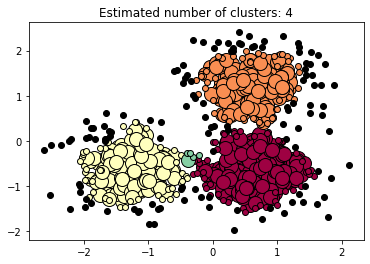

In [14]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

#### - START - Generate sample data - START - ####

centers = [[1,1], [1,-1], [-1,-1]]
#centers = [[1,1], [-1,-1], [1,-1]]
X, labels_true = make_blobs(n_samples=900, centers=centers, cluster_std=0.4,
                            random_state=0
)

X = StandardScaler().fit_transform(X)

#### - END - Generate sample data - END - ####

#### - START - Compute DBSCAN - START - ####

db = DBSCAN(eps=0.2, min_samples=10).fit(X)
# Create an array that will contain the indices of core points
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# Set to true the indexes corresponding to core points
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present
# label = -1 corresponds to noise
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
# count how many -1s we have in labels
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Homogeneity: % 0.3f" % metrics.homogeneity_score(labels_true=labels_true, labels_pred=labels))
print("Completeness: % 0.3f" % metrics.completeness_score(labels_true=labels_true, labels_pred=labels))
print("V-measure: % 0.3f" % metrics.v_measure_score(labels_true=labels_true, labels_pred=labels))
print("Adjusted Rand Index: % 0.3f" % metrics.adjusted_rand_score(labels_true=labels_true, labels_pred=labels))
print("Adjusted Mutual Information: % 0.3f" % metrics.adjusted_mutual_info_score(labels_true=labels_true, labels_pred=labels))
print("Silhouette Coefficient: % 0.3f" % metrics.silhouette_score(X=X, labels=labels))

#### - END - Compute DBSCAN - END - ####

#### - START - Plot result - START - ####

import matplotlib.pyplot as plt

# Black is used for noise
unique_labels = set(labels)
# np.linspace(<start>, <stop>, <how many points in the interval>)
colors = [plt.cm.Spectral(each) for each in np.linspace(0,1,len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if  k == -1: # point labeled as noise
        # Use the black
        col = [0,0,0,1]
    
    class_member_mask = labels == k
    
    # Select the points that belong to the label k and are core samples
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:,0],
        xy[:,1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor='k',
        markersize=14,
    )
    
    # Select the points that belong to the cluster (the label) but are not
    # core points -> border points
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:,0],
        xy[:,1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor='k',
        markersize=6,
    )
    
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()
#### - END - Plot result - END - ####


In [3]:
set(labels)

{-1, 0, 1, 2}

In [4]:
np.linspace(0,1, len(set(labels)))

array([0.        , 0.33333333, 0.66666667, 1.        ])

In [17]:
std_deviations = np.linspace(start = 0, stop = 0.8, num = 9)
std_deviations

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])

Make blobs standard deviation is 0.000000
	- Estimated number of clusters: 3
	- Estimated number of noise points: 0
	- Homogeneity:  1.000
	- Completeness:  1.000
	- V-measure:  1.000
	- Adjusted Rand Index:  1.000
	- Adjusted Mutual Information:  1.000
	- Silhouette Coefficient:  1.000


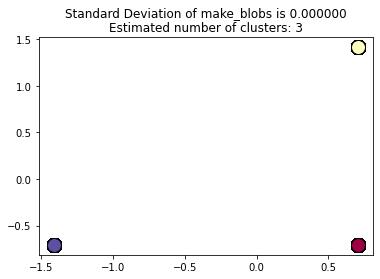

Make blobs standard deviation is 0.100000
	- Estimated number of clusters: 3
	- Estimated number of noise points: 0
	- Homogeneity:  1.000
	- Completeness:  1.000
	- V-measure:  1.000
	- Adjusted Rand Index:  1.000
	- Adjusted Mutual Information:  1.000
	- Silhouette Coefficient:  0.912


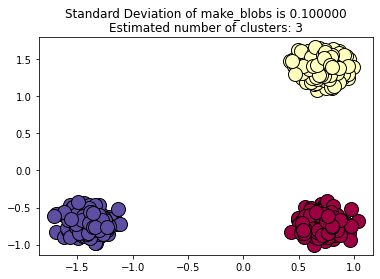

Make blobs standard deviation is 0.200000
	- Estimated number of clusters: 3
	- Estimated number of noise points: 5
	- Homogeneity:  0.995
	- Completeness:  0.970
	- V-measure:  0.982
	- Adjusted Rand Index:  0.992
	- Adjusted Mutual Information:  0.982
	- Silhouette Coefficient:  0.788


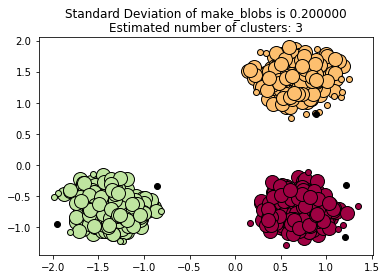

Make blobs standard deviation is 0.300000
	- Estimated number of clusters: 3
	- Estimated number of noise points: 32
	- Homogeneity:  0.965
	- Completeness:  0.874
	- V-measure:  0.917
	- Adjusted Rand Index:  0.946
	- Adjusted Mutual Information:  0.917
	- Silhouette Coefficient:  0.683


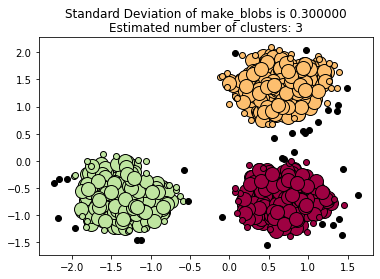

Make blobs standard deviation is 0.400000
	- Estimated number of clusters: 3
	- Estimated number of noise points: 83
	- Homogeneity:  0.897
	- Completeness:  0.755
	- V-measure:  0.820
	- Adjusted Rand Index:  0.850
	- Adjusted Mutual Information:  0.819
	- Silhouette Coefficient:  0.564


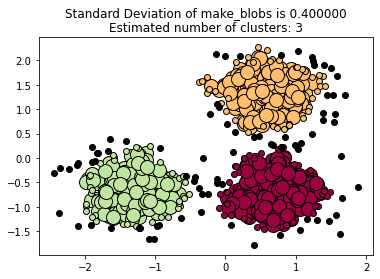

Make blobs standard deviation is 0.500000
	- Estimated number of clusters: 4
	- Estimated number of noise points: 124
	- Homogeneity:  0.780
	- Completeness:  0.624
	- V-measure:  0.693
	- Adjusted Rand Index:  0.727
	- Adjusted Mutual Information:  0.692
	- Silhouette Coefficient:  0.259


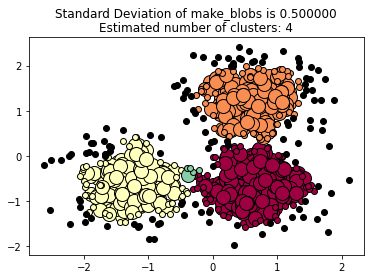

Make blobs standard deviation is 0.600000
	- Estimated number of clusters: 4
	- Estimated number of noise points: 178
	- Homogeneity:  0.036
	- Completeness:  0.061
	- V-measure:  0.046
	- Adjusted Rand Index:  0.008
	- Adjusted Mutual Information:  0.040
	- Silhouette Coefficient: -0.168


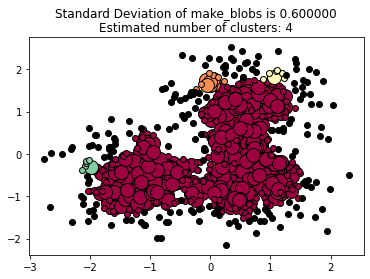

Make blobs standard deviation is 0.700000
	- Estimated number of clusters: 4
	- Estimated number of noise points: 213
	- Homogeneity:  0.330
	- Completeness:  0.326
	- V-measure:  0.328
	- Adjusted Rand Index:  0.280
	- Adjusted Mutual Information:  0.325
	- Silhouette Coefficient: -0.073


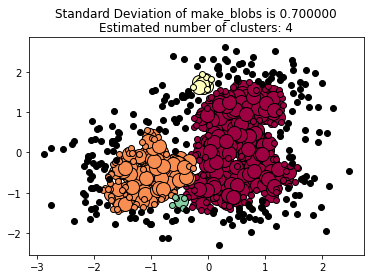

Make blobs standard deviation is 0.800000
	- Estimated number of clusters: 4
	- Estimated number of noise points: 241
	- Homogeneity:  0.044
	- Completeness:  0.061
	- V-measure:  0.051
	- Adjusted Rand Index:  0.006
	- Adjusted Mutual Information:  0.046
	- Silhouette Coefficient: -0.249


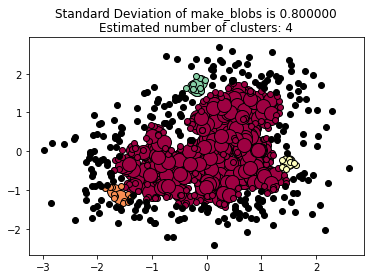

Make blobs standard deviation is 0.900000
	- Estimated number of clusters: 4
	- Estimated number of noise points: 275
	- Homogeneity:  0.034
	- Completeness:  0.048
	- V-measure:  0.040
	- Adjusted Rand Index:  0.008
	- Adjusted Mutual Information:  0.035
	- Silhouette Coefficient: -0.245


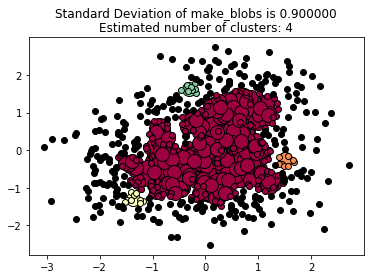

Make blobs standard deviation is 1.000000
	- Estimated number of clusters: 3
	- Estimated number of noise points: 304
	- Homogeneity:  0.026
	- Completeness:  0.038
	- V-measure:  0.031
	- Adjusted Rand Index:  0.009
	- Adjusted Mutual Information:  0.027
	- Silhouette Coefficient: -0.112


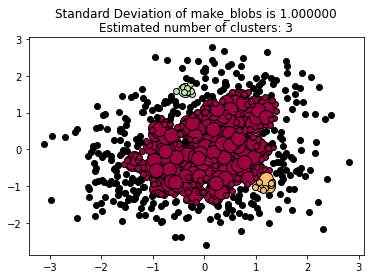

In [21]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

#### - START - Generate sample data - START - ####

centers = [[1,1], [1,-1], [-1,-1]]
std_deviations = np.linspace(start = 0, stop = 1, num = 11)
for std in std_deviations:
    
    print("Make blobs standard deviation is %f" % std)
    
    X, labels_true = make_blobs(n_samples=900, centers=centers, cluster_std=std,
                                random_state=0
    )

    X = StandardScaler().fit_transform(X)

    #### - END - Generate sample data - END - ####

    #### - START - Compute DBSCAN - START - ####

    db = DBSCAN(eps=0.2, min_samples=10).fit(X)
    # Create an array that will contain the indices of core points
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    # Set to true the indexes corresponding to core points
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present
    # label = -1 corresponds to noise
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    # count how many -1s we have in labels
    n_noise_ = list(labels).count(-1)

    print("\t- Estimated number of clusters: %d" % n_clusters_)
    print("\t- Estimated number of noise points: %d" % n_noise_)
    print("\t- Homogeneity: % 0.3f" % metrics.homogeneity_score(labels_true=labels_true, labels_pred=labels))
    print("\t- Completeness: % 0.3f" % metrics.completeness_score(labels_true=labels_true, labels_pred=labels))
    print("\t- V-measure: % 0.3f" % metrics.v_measure_score(labels_true=labels_true, labels_pred=labels))
    print("\t- Adjusted Rand Index: % 0.3f" % metrics.adjusted_rand_score(labels_true=labels_true, labels_pred=labels))
    print("\t- Adjusted Mutual Information: % 0.3f" % metrics.adjusted_mutual_info_score(labels_true=labels_true, labels_pred=labels))
    print("\t- Silhouette Coefficient: % 0.3f" % metrics.silhouette_score(X=X, labels=labels))

    #### - END - Compute DBSCAN - END - ####

    #### - START - Plot result - START - ####

    import matplotlib.pyplot as plt

    # Black is used for noise
    unique_labels = set(labels)
    # np.linspace(<start>, <stop>, <how many points in the interval>)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0,1,len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if  k == -1: # point labeled as noise
            # Use the black
            col = [0,0,0,1]
        
        class_member_mask = labels == k
        
        # Select the points that belong to the label k and are core samples
        xy = X[class_member_mask & core_samples_mask]
        plt.plot(
            xy[:,0],
            xy[:,1],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor='k',
            markersize=14,
        )
        
        # Select the points that belong to the cluster (the label) but are not
        # core points -> border points
        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(
            xy[:,0],
            xy[:,1],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor='k',
            markersize=6,
        )
        
    plt.title("Standard Deviation of make_blobs is %f\nEstimated number of clusters: %d" % (std, n_clusters_))
    plt.show()
    #### - END - Plot result - END - ####
